# Thermodynamic Feasibility Sigmoid Transformation

This notebook visualizes how the sigmoid transformation converts reaction enthalpy (ΔH) from Pathermo into a 0-1 feasibility score used for reward scaling in MCTS.

The sigmoid formula is:

$$\text{feasibility} = \frac{1}{1 + e^{k \cdot (\Delta H - \text{threshold})}}$$

Where:
- $\Delta H$ = enthalpy of reaction (kcal/mol)
- $k$ = steepness parameter (default 0.2)
- threshold = center point (default 15 kcal/mol)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Matplotlib styling (your preferred parameters)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.autolayout'] = True
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.grid'] = False

# Ensure figures directory exists
figures_dir = Path('../figures')
figures_dir.mkdir(parents=True, exist_ok=True)

In [2]:
def sigmoid_transform(delta_h, k=0.2, threshold=15.0):
    """
    Transform enthalpy of reaction (ΔH) to a 0-1 feasibility score.
    
    Uses sigmoid function: 1 / (1 + exp(k * (ΔH - threshold)))
    
    Args:
        delta_h: Enthalpy of reaction in kcal/mol (can be array)
        k: Steepness of sigmoid (default 0.2)
        threshold: Center point of sigmoid in kcal/mol (default 15.0)
    
    Returns:
        Feasibility score in [0.0, 1.0] where higher = more feasible
    """
    return 1.0 / (1.0 + np.exp(k * (delta_h - threshold)))

## Plot 1: Sigmoid Transformation with k = 0.2

This shows how reaction enthalpy maps to feasibility score with the default steepness parameter.

Figure saved to: ../figures/thermodynamic_sigmoid_k0.2.png


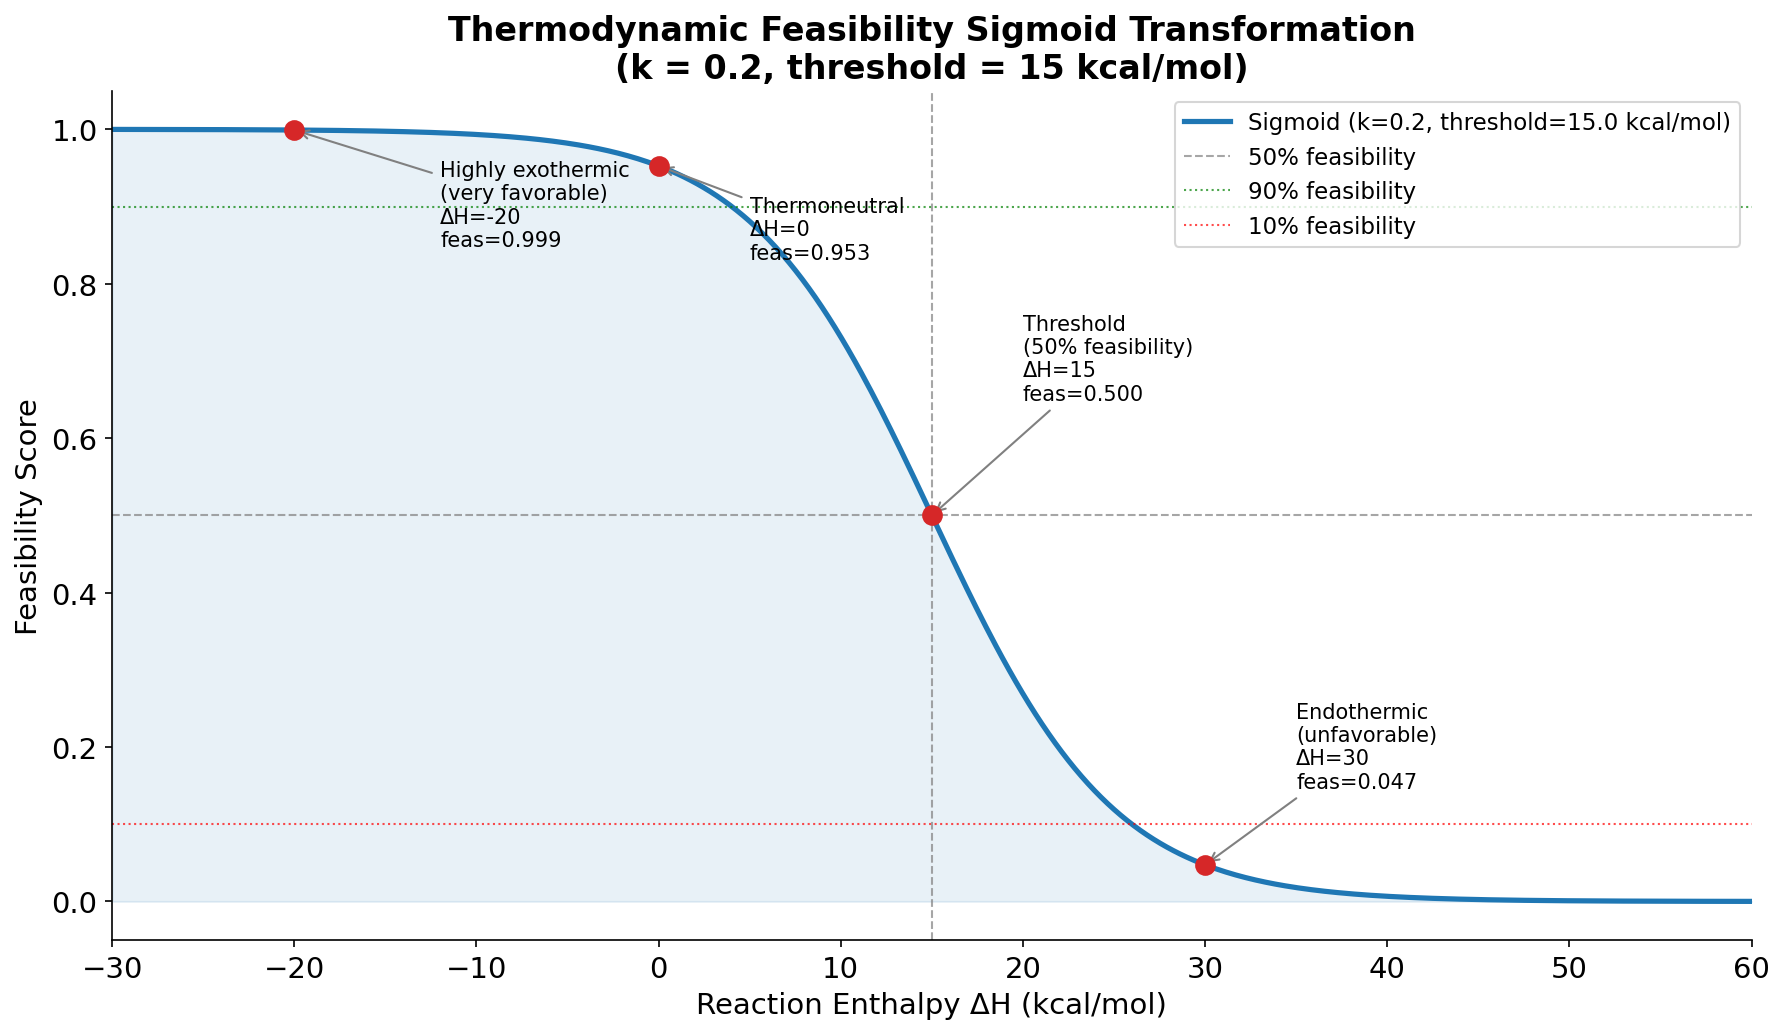

In [3]:
# Generate ΔH values from -30 to 60 kcal/mol
delta_h_values = np.linspace(-30, 60, 500)

# Calculate feasibility scores with k=0.2
k = 0.2
threshold = 15.0
feasibility_scores = sigmoid_transform(delta_h_values, k=k, threshold=threshold)

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the sigmoid curve
ax.plot(delta_h_values, feasibility_scores, color='#1f77b4', linewidth=2.5,
        label=f'Sigmoid (k={k}, threshold={threshold} kcal/mol)')

# Add horizontal reference lines
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='50% feasibility')
ax.axhline(y=0.9, color='green', linestyle=':', linewidth=1, alpha=0.7, label='90% feasibility')
ax.axhline(y=0.1, color='red', linestyle=':', linewidth=1, alpha=0.7, label='10% feasibility')

# Add vertical reference line at threshold
ax.axvline(x=threshold, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Add annotations for key points
key_points = [
    (-20, 'Highly exothermic\n(very favorable)'),
    (0, 'Thermoneutral'),
    (15, 'Threshold\n(50% feasibility)'),
    (30, 'Endothermic\n(unfavorable)'),
]

for dh, label in key_points:
    feas = sigmoid_transform(dh, k=k, threshold=threshold)
    ax.scatter([dh], [feas], color='#d62728', s=80, zorder=5)
    
    # Position annotations
    if dh == -20:
        ax.annotate(f'{label}\nΔH={dh}\nfeas={feas:.3f}', 
                    xy=(dh, feas), xytext=(dh+8, feas-0.15),
                    fontsize=10, ha='left',
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1))
    elif dh == 0:
        ax.annotate(f'{label}\nΔH={dh}\nfeas={feas:.3f}', 
                    xy=(dh, feas), xytext=(dh+5, feas-0.12),
                    fontsize=10, ha='left',
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1))
    elif dh == 15:
        ax.annotate(f'{label}\nΔH={dh}\nfeas={feas:.3f}', 
                    xy=(dh, feas), xytext=(dh+5, feas+0.15),
                    fontsize=10, ha='left',
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1))
    else:
        ax.annotate(f'{label}\nΔH={dh}\nfeas={feas:.3f}', 
                    xy=(dh, feas), xytext=(dh+5, feas+0.1),
                    fontsize=10, ha='left',
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1))

# Formatting
ax.set_xlabel('Reaction Enthalpy ΔH (kcal/mol)', fontsize=14)
ax.set_ylabel('Feasibility Score', fontsize=14)
ax.set_title('Thermodynamic Feasibility Sigmoid Transformation\n(k = 0.2, threshold = 15 kcal/mol)', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.set_xlim(-30, 60)
ax.set_ylim(-0.05, 1.05)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add shaded regions
ax.fill_between(delta_h_values, feasibility_scores, alpha=0.1, color='#1f77b4')

plt.tight_layout()

# Save figure
save_path = figures_dir / 'thermodynamic_sigmoid_k0.2.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")

plt.show()

### Reference Table: ΔH to Feasibility Mapping (k=0.2)

In [4]:
import pandas as pd

# Create reference table
reference_dh = [-30, -20, -10, 0, 5, 10, 15, 20, 25, 30, 40, 50]
reference_feas = [sigmoid_transform(dh, k=0.2, threshold=15.0) for dh in reference_dh]

df = pd.DataFrame({
    'ΔH (kcal/mol)': reference_dh,
    'Feasibility Score': [f'{f:.4f}' for f in reference_feas],
    'Interpretation': [
        'Highly exothermic - very favorable',
        'Strongly exothermic - very favorable', 
        'Moderately exothermic - favorable',
        'Thermoneutral - favorable',
        'Slightly endothermic - favorable',
        'Moderately endothermic - marginally favorable',
        'Threshold - borderline (50%)',
        'Endothermic - unfavorable',
        'Significantly endothermic - unfavorable',
        'Highly endothermic - very unfavorable',
        'Extremely endothermic - essentially infeasible',
        'Prohibitively endothermic - infeasible',
    ]
})

print("Reference Table: ΔH to Feasibility Mapping (k=0.2, threshold=15)")
print("=" * 80)
display(df)

Reference Table: ΔH to Feasibility Mapping (k=0.2, threshold=15)


,ΔH (kcal/mol),Feasibility Score,Interpretation
0,-30,0.9999,Highly exothermic - very favorable
1,-20,0.9991,Strongly exothermic - very favorable
2,-10,0.9933,Moderately exothermic - favorable
3,0,0.9526,Thermoneutral - favorable
4,5,0.8808,Slightly endothermic - favorable
5,10,0.7311,Moderately endothermic - marginally favorable
6,15,0.5000,Threshold - borderline (50%)
7,20,0.2689,Endothermic - unfavorable
8,25,0.1192,Significantly endothermic - unfavorable
9,30,0.0474,Highly endothermic - very unfavorable


## Plot 2: Effect of Steepness Parameter k

This shows how different values of k affect the sigmoid shape:
- **Lower k** (e.g., 0.1): Gentler transition, more tolerance for unfavorable reactions
- **Higher k** (e.g., 0.5): Sharper transition, stricter feasibility cutoff

Figure saved to: ../figures/thermodynamic_sigmoid_k_comparison.png


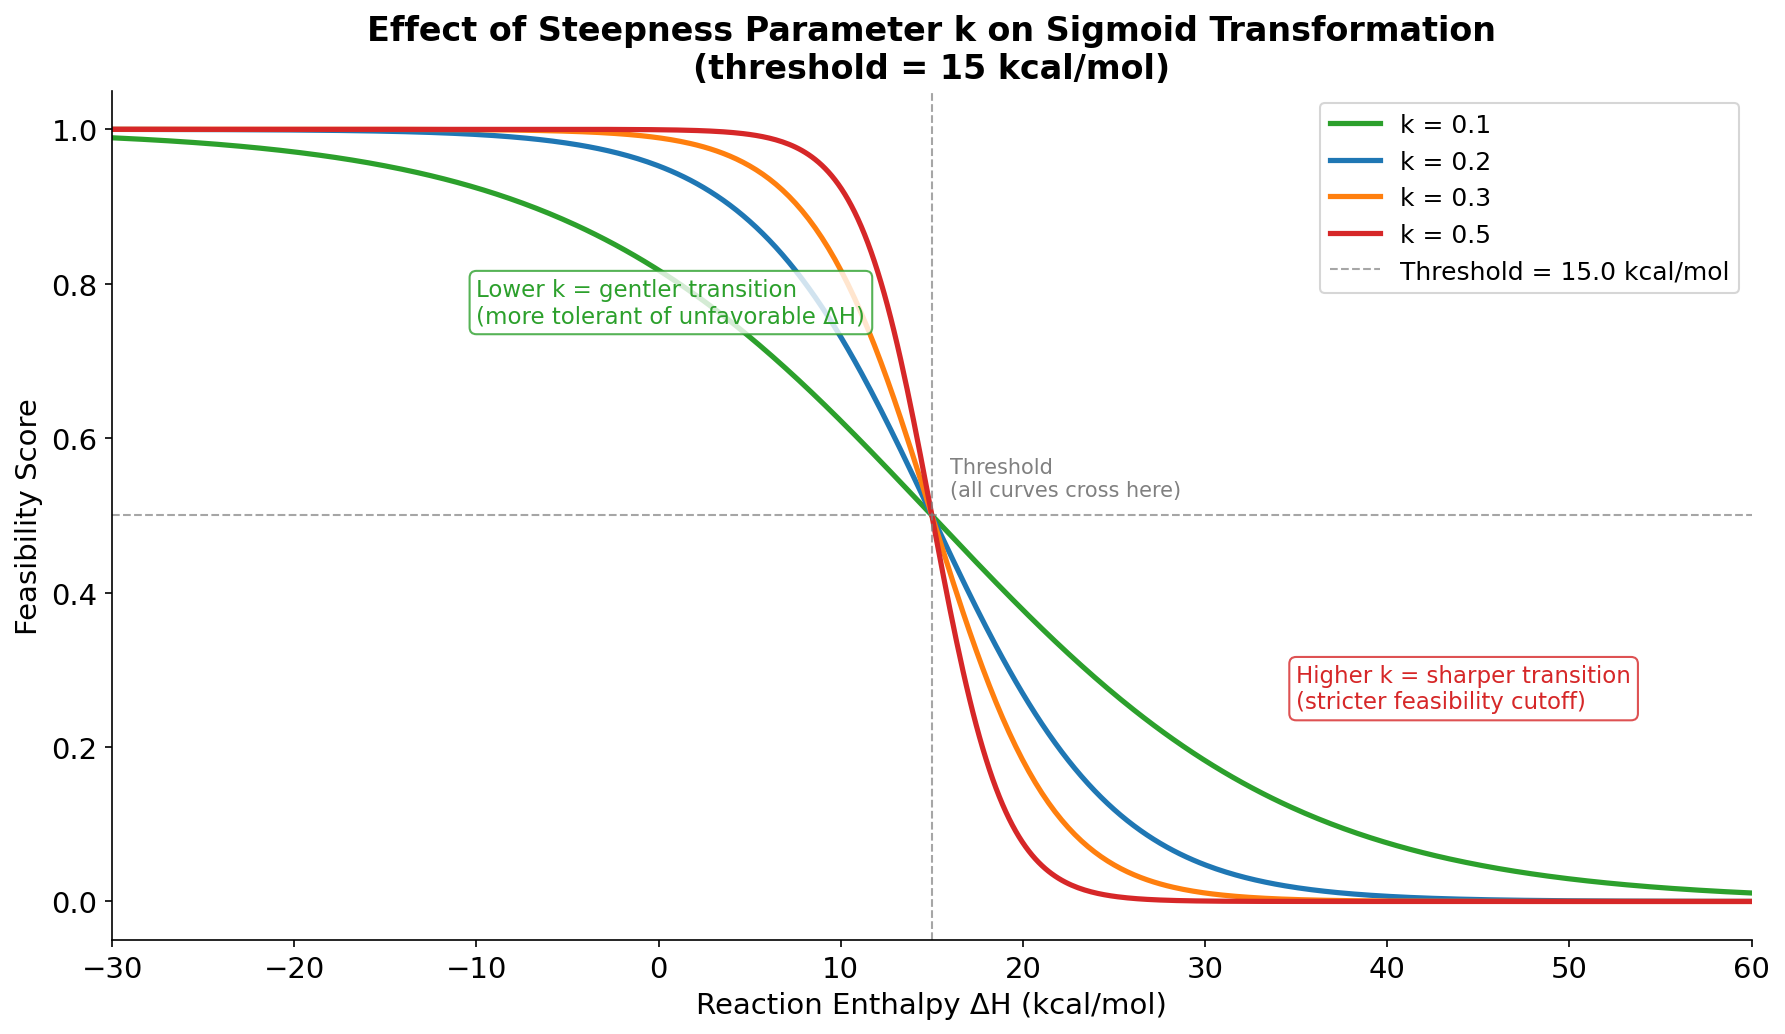

In [5]:
# Different k values to compare
k_values = [0.1, 0.2, 0.3, 0.5]
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']
threshold = 15.0

# Generate ΔH values
delta_h_values = np.linspace(-30, 60, 500)

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each k value
for k, color in zip(k_values, colors):
    feasibility = sigmoid_transform(delta_h_values, k=k, threshold=threshold)
    ax.plot(delta_h_values, feasibility, color=color, linewidth=2.5,
            label=f'k = {k}')

# Add horizontal reference lines
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Add vertical reference line at threshold
ax.axvline(x=threshold, color='gray', linestyle='--', linewidth=1, alpha=0.7,
           label=f'Threshold = {threshold} kcal/mol')

# Add text annotation for threshold
ax.text(threshold + 1, 0.52, 'Threshold\n(all curves cross here)', 
        fontsize=10, color='gray', va='bottom')

# Formatting
ax.set_xlabel('Reaction Enthalpy ΔH (kcal/mol)', fontsize=14)
ax.set_ylabel('Feasibility Score', fontsize=14)
ax.set_title('Effect of Steepness Parameter k on Sigmoid Transformation\n(threshold = 15 kcal/mol)', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)
ax.set_xlim(-30, 60)
ax.set_ylim(-0.05, 1.05)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations explaining the effect
ax.annotate('Lower k = gentler transition\n(more tolerant of unfavorable ΔH)', 
            xy=(-10, 0.75), fontsize=11, color='#2ca02c',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#2ca02c', alpha=0.8))

ax.annotate('Higher k = sharper transition\n(stricter feasibility cutoff)', 
            xy=(35, 0.25), fontsize=11, color='#d62728',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#d62728', alpha=0.8))

plt.tight_layout()

# Save figure
save_path = figures_dir / 'thermodynamic_sigmoid_k_comparison.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")

plt.show()

### Comparison Table: Feasibility at Key ΔH Values for Different k

In [6]:
# Create comparison table
comparison_dh = [-20, -10, 0, 10, 15, 20, 30, 40]
k_values = [0.1, 0.2, 0.3, 0.5]

data = {'ΔH (kcal/mol)': comparison_dh}
for k in k_values:
    data[f'k = {k}'] = [f'{sigmoid_transform(dh, k=k, threshold=15.0):.3f}' 
                        for dh in comparison_dh]

comparison_df = pd.DataFrame(data)

print("Feasibility Scores at Key ΔH Values for Different k Parameters")
print("=" * 70)
display(comparison_df)

Feasibility Scores at Key ΔH Values for Different k Parameters


,ΔH (kcal/mol),k = 0.1,k = 0.2,k = 0.3,k = 0.5
0,-20,0.971,0.999,1.000,1.000
1,-10,0.924,0.993,0.999,1.000
2,0,0.818,0.953,0.989,0.999
3,10,0.622,0.731,0.818,0.924
4,15,0.500,0.500,0.500,0.500
5,20,0.378,0.269,0.182,0.076
6,30,0.182,0.047,0.011,0.001
7,40,0.076,0.007,0.001,0.000


## Interpretation & Recommendations

### What k value should you use?

| k value | Behavior | Use case |
|---------|----------|----------|
| **0.1** | Very gentle: ΔH=30 still gets ~18% score | When thermodynamic estimates are uncertain |
| **0.2** | Moderate (default): ΔH=30 gets ~5% score | Balanced exploration/exploitation |
| **0.3** | Steeper: ΔH=30 gets ~1% score | When you trust thermodynamic predictions |
| **0.5** | Sharp: ΔH=25 already <1% score | Strict filtering, high confidence in ΔH |

### The threshold parameter

The default threshold of **15 kcal/mol** represents the boundary between "marginally feasible" and "infeasible" reactions. This is a reasonable chemical heuristic:
- Reactions below ~15 kcal/mol are often thermodynamically accessible
- Reactions above ~15 kcal/mol typically require energy input or coupling

In [7]:
print("Summary of Sigmoid Parameters Used in DORAnet MCTS:")
print("="*60)
print(f"  Default k (steepness):     0.2")
print(f"  Default threshold:         15.0 kcal/mol")
print(f"  Formula: feas = 1 / (1 + exp(k × (ΔH - threshold)))")
print("\nKey mappings with default parameters:")
for dh in [-20, 0, 15, 30, 50]:
    feas = sigmoid_transform(dh, k=0.2, threshold=15.0)
    print(f"  ΔH = {dh:>4} kcal/mol  →  feasibility = {feas:.4f}")

Summary of Sigmoid Parameters Used in DORAnet MCTS:
  Default k (steepness):     0.2
  Default threshold:         15.0 kcal/mol
  Formula: feas = 1 / (1 + exp(k × (ΔH - threshold)))

Key mappings with default parameters:
  ΔH =  -20 kcal/mol  →  feasibility = 0.9991
  ΔH =    0 kcal/mol  →  feasibility = 0.9526
  ΔH =   15 kcal/mol  →  feasibility = 0.5000
  ΔH =   30 kcal/mol  →  feasibility = 0.0474
  ΔH =   50 kcal/mol  →  feasibility = 0.0009
